<a href="https://colab.research.google.com/github/victorialarrazolo/USaccidentsanaysis/blob/main/USaccidentsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accidents in the United States Analysis 


In [1]:
pip install -U matplotlib

In [2]:
pip install opendatasets

In [3]:
pip install geoplot

In [4]:
pip install fuzzywuzzy

In [5]:
pip install python-Levenshtein==0.12.0

In [6]:
pip install geopandas

In [7]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [8]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [9]:
# read & load the dataset into pandas dataframe
df = pd.read_csv('/content/us-accidents/US_Accidents_Dec20_updated.csv')

In [10]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 1,516,064 & Columns: 47


In [11]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

#Analysis based off of location 

In [12]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})


In [13]:
top_10_cities = pd.DataFrame(city_df.head(10))

findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.


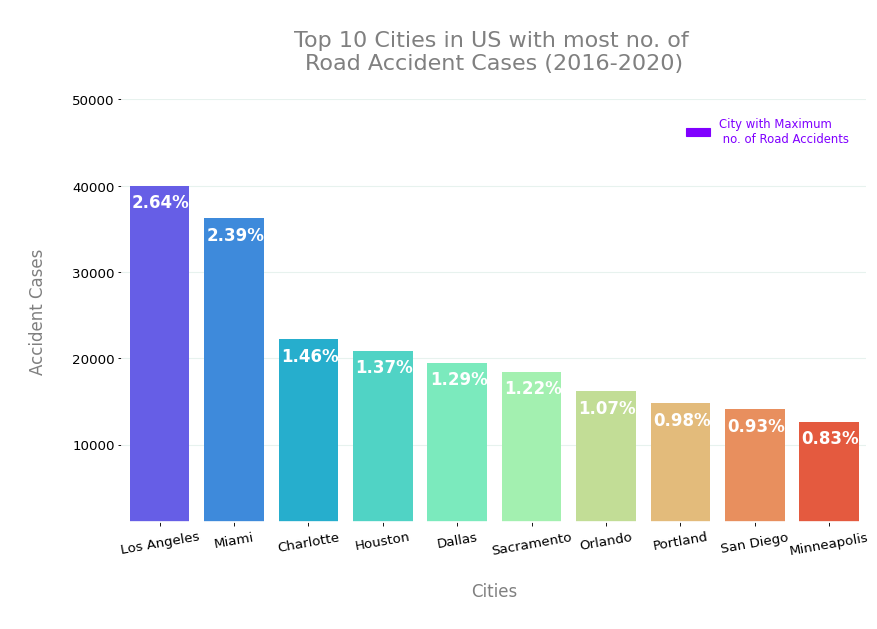

In [14]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2020)\n', size=20, color='grey')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 50000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()


- Los angeles has the highest # of road accidents (2.64%)
- Miami has the seconnd highest number of road accidents (2.39%)
- Around 14% accident records of past 5 years are only from these 10 cities out of 10,657 cities in US (as per the dataset).

In [15]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/5))
print(round(hightest_cases/(5*365)))

7997
22


- In past 5 years (2016-2020) yearly 7,997 road accidents (average) happened in Los Angeles.

- In Los Angeles averagely in every 12 hours 11 accidents occurred.

In [16]:
# US States
states = gpd.read_file('/content/us-accidents/US_Accidents_Dec20_updated.csv')

def lat(city):
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    return (location.latitude)

def lng(city):
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    return (location.longitude)

# list of top 10 cities
top_ten_city_list = list(city_df.City.head(10))

top_ten_city_lat_dict = {}
top_ten_city_lng_dict = {}
for i in top_ten_city_list:
    top_ten_city_lat_dict[i] = lat(i)
    top_ten_city_lng_dict[i] = lng(i)
    
top_10_cities_df = df[df['City'].isin(list(top_10_cities.City))]

top_10_cities_df['New_Start_Lat'] = top_10_cities_df['City'].map(top_ten_city_lat_dict)
top_10_cities_df['New_Start_Lng'] = top_10_cities_df['City'].map(top_ten_city_lng_dict)

KeyboardInterrupt: ignored